<a href="https://colab.research.google.com/github/RaymanPython/ML_Yandex/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt



1 Скачайте датасет Fashion MNIST, посмотрите на картинки, отделите валидационную выборку и обучите одну полносвязную архитектуру. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the data into training and validation sets
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]



In [ ]:

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])




In [ ]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True,
                                   save_weights_only=False, monitor='val_loss')


In [ ]:

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[early_stopping, model_checkpoint])



Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5210 - accuracy: 0.8166 - val_loss: 2.2986 - val_accuracy: 0.1170
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5089 - accuracy: 0.8205 - val_loss: 2.3439 - val_accuracy: 0.1018
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5011 - accuracy: 0.8239 - val_loss: 2.3638 - val_accuracy: 0.1031
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5028 - accuracy: 0.8230 - val_loss: 2.3600 - val_accuracy: 0.1092


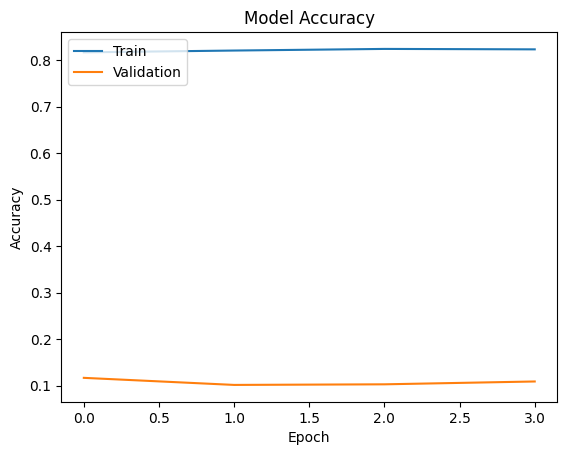

In [13]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



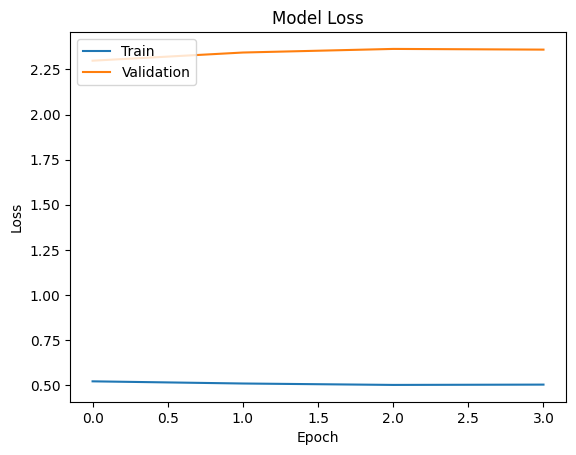

In [14]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [16]:
# Load the best saved model
best_model = tf.keras.models.load_model('best_model.h5')



In [17]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.8197
Test Loss: 0.5534535050392151
Test Accuracy: 0.8197000026702881


2 Добавьте в архитектуру свёртки. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.

In [21]:
# imports
from keras.layers import Conv2D, MaxPooling2D

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

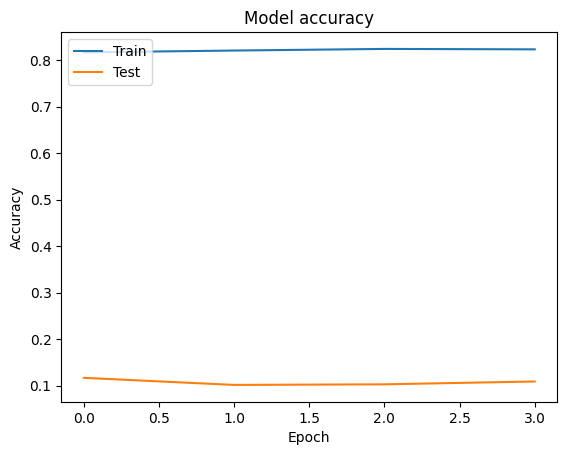

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


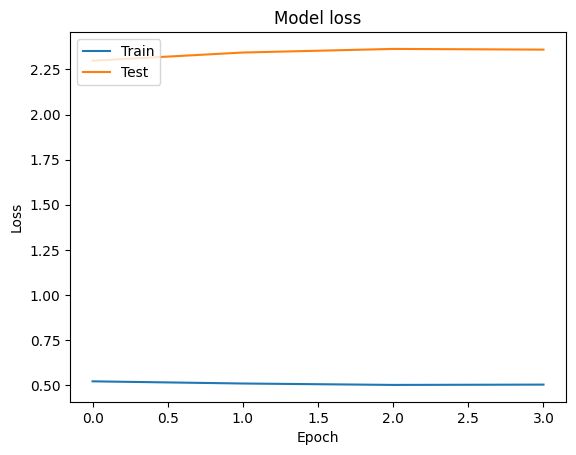

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


3 Добавьте аугментации в трейновый датасет, посмотрите на картинки. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.